In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
data_info = pd.read_csv("../data/data_info.txt")

In [3]:
test.isnull().sum()

SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    0
BUILT                      0
DEADWEIGHT                 0
DEPTH                      0
DRAUGHT                    0
GT                         0
LENGTH                     0
SHIPMANAGER                0
FLAG                       0
U_WIND                101927
V_WIND                101927
AIR_TEMPERATURE       102511
BN                    101927
ATA_LT                     0
DUBAI                      0
BRENT                      0
WTI                        0
BDI_ADJ                    0
PORT_SIZE                  0
dtype: int64

In [25]:
train.isnull().sum()
# test.isnull().sum()

SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                153486
V_WIND                153486
AIR_TEMPERATURE       154365
BN                    153486
ATA_LT                     0
DUBAI                      0
BRENT                      0
WTI                        0
BDI_ADJ                    0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

## feature info

In [4]:
data_info

,Feature Name,Description,단위,비고
0,ARI_CO,도착항의 소속국가(도착항 앞 2글자),NaN,NaN
1,ARI_PO,도착항의 항구명(도착항 뒤 글자),NaN,NaN
2,SHIP_TYPE_CATEGORY,선종 통합 바탕으로 5대 선종으로 분류,NaN,NaN
3,DIST,정박지(ber_port)와 접안지 사이의 거리,km,NaN
4,ATA,anc_port에 도착한 시점의 utc. 실제 정박 시각(Actual Time of...,hour,NaN
5,ID,선박식별 일련번호,NaN,NaN
6,BREADTH,선박의 폭,m,NaN
7,BUILT,선박의 연령,year,NaN
8,DEADWEIGHT,선박의 재화중량톤수,ton,NaN
9,DEPTH,선박의 깊이,m,NaN


In [7]:
train['DIST']

0         30.736578
1         63.220425
2         90.427421
3          0.000000
4          8.813725
            ...    
367436    59.018184
367437     0.000000
367438     1.768630
367439     0.000000
367440    32.152412
Name: DIST, Length: 367441, dtype: float64

In [27]:
print(len(train['SAMPLE_ID'].unique()))
print(len(train['ID'].unique()))

367441
24764


In [31]:
print(len(test['SAMPLE_ID'].unique()))
print(len(test['ID'].unique()))

244989
23249


In [40]:
# check_id = []
# for id in test["ID"].unique():
#     if id in set(train["ID"].unique()):
#         check_id.append(True)
#     else:
#         check_id.append(False)

<AxesSubplot:>

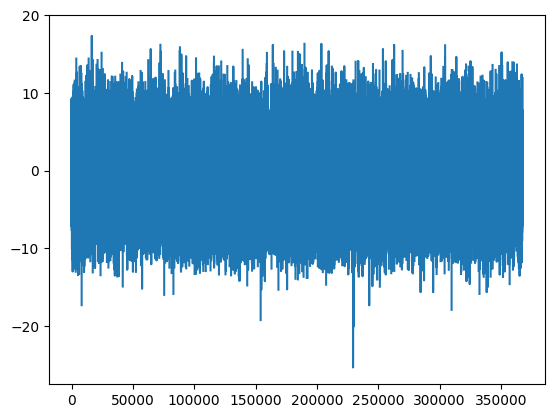

In [20]:
train['U_WIND'].plot()

In [42]:
len(set(train['ID'].unique()) & set(test['ID'].unique()))

21310

In [41]:
len(set(train['ID'].unique()) | set(test['ID'].unique()))

26703

In [9]:
train[train["SHIP_TYPE_CATEGORY"] == 'Tanker']['CI_HOUR'].mean()

76.92063716176175

In [8]:
train[train["SHIP_TYPE_CATEGORY"] == 'Container']['CI_HOUR'].mean()

39.63370531996334

In [7]:
train[train["SHIP_TYPE_CATEGORY"] == 'Cargo']['CI_HOUR'].mean()

74.45096214054317

In [6]:
train[train["SHIP_TYPE_CATEGORY"] == 'Bulk']['CI_HOUR'].mean()

79.38123353687838

In [10]:
test['SHIP_TYPE_CATEGORY'].unique()

array(['Tanker', 'Container', 'Cargo', 'Bulk'], dtype=object)

In [29]:
train['ID'].unique()

array(['Z517571', 'U467618', 'V378315', ..., 'W812631', 'Q748725',
       'D815237'], dtype=object)

### ARI_CO : categorical feature
* 'CN', 'JP', 'RU', 'AU', 'SG', 'ZA', 'KR', 'TW', 'TT', 'ID', 'BR', 'QA', 'LV', 'MZ', 'US', 'IN', 'UA', 'CA', 'MY', 'PE', 'VN', 'FI', 'CL', 'VE', 'PH'
* 25개
* 

In [5]:
print('도착항의 소속국가 앞 2 글자 : ',len(train['ARI_CO'].unique()))
print('도착항의 항구명 뒤 글자 : ',len(train['ARI_PO'].unique()))

도착항의 소속국가 앞 2 글자 :  25
도착항의 항구명 뒤 글자 :  103


In [22]:
train.groupby('ARI_CO')['ARI_PO'].value_counts()

ARI_CO  ARI_PO
AU      WHH4      9408
        AIB7      4913
        NQO4      4010
        KSF1      3520
        YDP4      3342
                  ... 
VE      JEA6        89
VN      QRN3       792
        JGL5       677
        ONW1        17
ZA      CXL1      1560
Name: ARI_PO, Length: 104, dtype: int64

In [23]:
train[['ARI_CO', 'ARI_PO']].value_counts()

ARI_CO  ARI_PO
SG      GIW5      41214
CN      NGG6      27243
TW      JWI3      22995
CN      EUC8      21263
        EKP8      18465
                  ...  
PH      XZF6         85
RU      ZME5         38
VN      ONW1         17
ID      DIN2         13
CN      RGT8          6
Length: 104, dtype: int64